# Clustering

# Table of contents
1. [Learning motivation](#learningmotivation)
2. [K-means clustering](#kmeans)
3. [Scikit-learn workflow](#scikit)
4. [Another example](#example)
5. [Visualizing the decision boundaries -  _Voronoi_ diagrams](#voronoi)
6. [How to determine k](#determinek)
7. [Silhouette score](#silhouette)
8. [Silhouette diagrams](#silhouettediagram)
9. [The importance of scaling](#scaling)

### Learning motivation / points to consider <a name="learningmotivation"></a>

One of the most common use cases in unsupervised machine learning is the identification of clusters - discrete groups of samples which are somehow closer related to samples within the same cluster than they are with those outside. Once we abstract our data in to a general *d*-dimensional space of N samples, we can quickly start to apply our intuition to how to determine cluster membership. 

- You may be wondering which clustering algorithm is the best to find "natural subgroups" in your data?
- Well, the nature of the data will answer that question. 
- For example, a large dataset could preclude computationally intensive algorithms (e.g hierarchical clustering or affinity propagation). 
- Is anything known about the underlying structure (e.g. globular versus non-globular)? 
- Are you looking for a specific number of clusters? 
- So, unfortunately, you need to have various algorithms in your toolbox, ready to deploy as the circumstances dicate 

- (or **you could just use k-means for everything**).

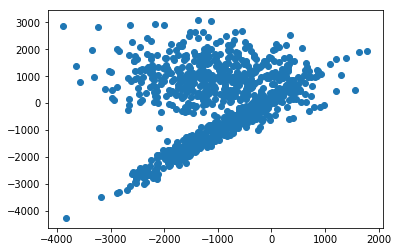

In [2]:
from IPython.display import Image
Image(filename='./assets/scatter-2d.png', width=500)

**If you were to manually group the data in the above graph, how would you do it?**<br>
    You might draw two circles, like this:

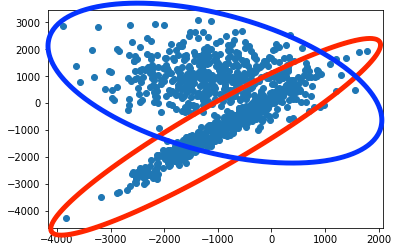

In [3]:
Image(filename='./assets/scatter-2d-circled.png', width=500)

And this is what we obtain using an appropriate clustering algorithm (e.g. Gaussian mixture model).

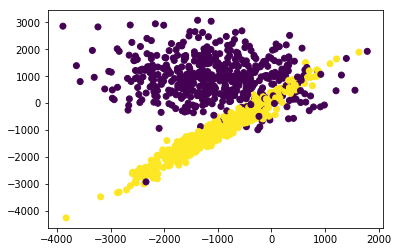

In [4]:
Image(filename='./assets/scatter-2d-segments.png', width=500)

But before delving into advanced models like GMM, we have to introduce the basics.

## K-Means clustering <a name="kmeans"></a>

This is the most fundamental clustering algorithm. 

<img src="assets/KMeans_animation.gif" style="float:left"/>

Assuming we know *a priori* the number of clusters (k), the algorithm starts by placing k coordinates (centroides c) in the feature space. First all samples are assigned to their closest centroid. Once assigned, we update the centroid location as the mean of all the samples belonging to it. These steps are allowed to continue until convergence.

In [1]:
#import libraries
import os
import sys
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
from sklearn.datasets import make_blobs # to generate new datasets
from sklearn.cluster import KMeans   # clustering algorithm

In [3]:
# create 1000 points on 4 clusters
X, y = make_blobs(n_samples=200, centers=4,random_state=42, cluster_std=1.5)

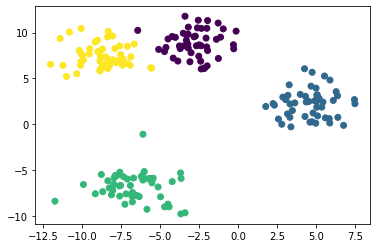

In [4]:
# visualize the example data
def scatter(X, y=None, ax=plt):
    ax.scatter(X[:,0], X[:,1], c=y)
scatter(X,y)

## The scikit-learn workflow <a name="scikit"></a>

- initialize model
- fit ("train") model
- predict using model

In [5]:
# initialize model
model = KMeans(4, random_state=0)

In [6]:
# train model 
model.fit(X)

KMeans(n_clusters=4, random_state=0)

In [7]:
# predict target values (classes)
y = model.predict(X)
y

array([2, 3, 3, 3, 0, 0, 2, 3, 2, 0, 0, 2, 2, 0, 0, 0, 1, 3, 0, 0, 0, 0,
       3, 1, 3, 1, 1, 0, 1, 2, 0, 0, 3, 3, 1, 2, 3, 2, 3, 1, 0, 1, 0, 0,
       3, 2, 2, 0, 2, 1, 3, 1, 3, 2, 1, 1, 0, 0, 1, 2, 3, 2, 0, 3, 3, 0,
       2, 1, 3, 1, 1, 3, 1, 0, 2, 0, 2, 1, 0, 1, 1, 2, 0, 3, 3, 3, 3, 1,
       2, 3, 0, 1, 2, 2, 2, 3, 1, 2, 0, 1, 3, 3, 1, 0, 1, 2, 3, 0, 0, 3,
       2, 0, 1, 3, 1, 3, 3, 1, 1, 1, 3, 0, 2, 3, 3, 2, 1, 2, 2, 1, 0, 0,
       1, 3, 3, 2, 0, 0, 1, 0, 2, 1, 3, 2, 2, 1, 2, 3, 0, 0, 1, 3, 2, 3,
       0, 3, 3, 2, 2, 2, 1, 2, 2, 3, 1, 0, 2, 2, 0, 2, 3, 1, 0, 0, 2, 0,
       2, 1, 1, 0, 1, 0, 3, 3, 3, 1, 2, 2, 2, 1, 1, 0, 3, 3, 1, 3, 2, 1,
       0, 2])

The model here is itself a python *object*, and can thus have certain attributes, such as the centroids locations:

In [8]:
centroids = model.cluster_centers_
centroids

array([[-6.69118023, -6.89411831],
       [-2.72328916,  8.8186043 ],
       [ 4.55617572,  2.22813176],
       [-8.66066413,  7.5046551 ]])

In [9]:
# Make a function for common plot formatting
def format_plot(ax, title):
    ax.xaxis.set_major_formatter(plt.NullFormatter())
    ax.yaxis.set_major_formatter(plt.NullFormatter())
    ax.set_xlabel('feature 1', color='black')
    ax.set_ylabel('feature 2', color='black')
    ax.set_title(title, color='black')

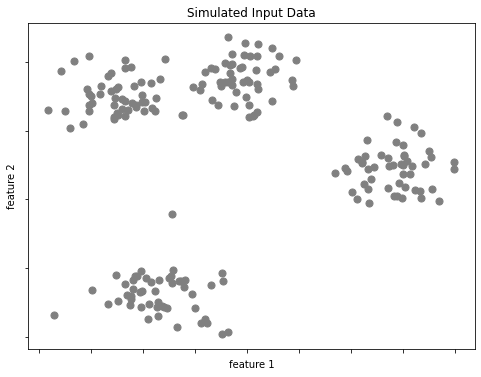

In [10]:
fig, ax = plt.subplots(figsize=(8, 6))
ax.scatter(X[:, 0], X[:, 1], s=50, color='gray')

# format the plot
format_plot(ax, 'Simulated Input Data')

plt.show()
# fig.savefig('assets/k-means-clustering-1.png')

#### Exercise 1.Plot the data with color-coded cluster labels and star-shaped cluster centroids

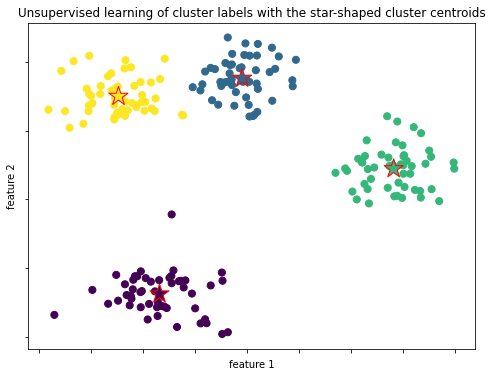

In [11]:
# %load solutions/ex2_1.py

#example of a solution
fig, ax = plt.subplots(figsize=(8, 6))
ax.scatter(X[:, 0], X[:, 1], s=50, c=y, cmap='viridis')
ax.scatter(centroids[:, 0], centroids[:, 1], marker='*', s=400, c=range(4), cmap='viridis', edgecolors = 'red')

# format the plot
format_plot(ax, 'Unsupervised learning of cluster labels with the star-shaped cluster centroids')

plt.show()

### Another example <a name="example"></a>

In [12]:
# make 5 cluster centers
blob_centers = np.array(
    [[ 0.2,  2.3],
     [-1.5 ,  2.3],
     [-2.8,  1.8],
     [-2.8,  2.8],
     [-2.8,  1.3],
     ])
blob_std = np.array([0.4, 0.3, 0.1, 0.1, 0.1])

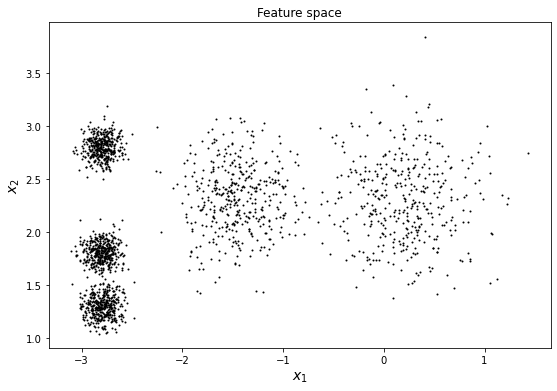

In [13]:
# make 5 clusters using centerpoints
X, y = make_blobs(n_samples=2000, centers=blob_centers,
                  cluster_std=blob_std, random_state=42)

# auxiliary function for plotting
def plot_clusters(X, y=None):
    if y==None:
        plt.scatter(X[:, 0], X[:, 1], c='k', s=1)
    else:
        plt.scatter(X[:, 0], X[:, 1], c=y, s=1)        
    plt.xlabel("$x_1$", fontsize=14)
    plt.ylabel("$x_2$", fontsize=14, rotation=90)
    
plt.figure(figsize=(9, 6))
plot_clusters(X)
plt.title('Feature space')
plt.show()

In [14]:
K = 5
kmeans = KMeans(n_clusters=K, random_state=42)
y_pred = kmeans.fit_predict(X)

Count the cardinality of each cluster:

In [15]:
# Using np.bincount()
print(len(y_pred))  #  number of datapoints
print(y_pred)       #  predicted labels
np.bincount(y_pred) # cardinality (number of datapoints in each cluster)

2000
[2 1 3 ... 1 2 4]


array([401, 392, 403, 403, 401], dtype=int64)

## Visualizing the decision boundaries -  _Voronoi_ diagrams <a name="voronoi"></a>

In [17]:
# don't worry about this code

# few auxiliary functions
def plot_data(X):
    plt.plot(X[:, 0], X[:, 1], 'k.', markersize=2)

def plot_centroids(centroids, weights=None, circle_color='w', cross_color='k'):
    if weights is not None:
        centroids = centroids[weights > weights.max() / 10]
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='o', s=30, linewidths=8,
                color=circle_color, zorder=10, alpha=0.9)
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='x', s=50, linewidths=50,
                color=cross_color, zorder=11, alpha=1)

def plot_decision_boundaries(clusterer, X, resolution=1000, show_centroids=True,
                             show_xlabels=True, show_ylabels=True):
    mins = X.min(axis=0) - 0.1
    maxs = X.max(axis=0) + 0.1
    xx, yy = np.meshgrid(np.linspace(mins[0], maxs[0], resolution),
                         np.linspace(mins[1], maxs[1], resolution))
    Z = clusterer.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                cmap="Pastel2")
    plt.contour(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                linewidths=1, colors='k')
    plot_data(X)
    if show_centroids:
        plot_centroids(clusterer.cluster_centers_)

    if show_xlabels:
        plt.xlabel("$x_1$", fontsize=14)
    else:
        plt.tick_params(labelbottom=False)
    if show_ylabels:
        plt.ylabel("$x_2$", fontsize=14, rotation=90)
    else:
        plt.tick_params(labelleft=False)

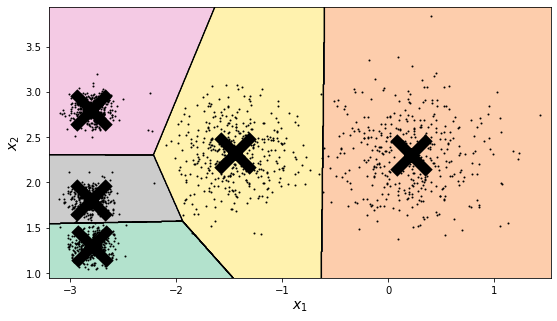

In [18]:
plt.figure(figsize=(9, 5))
plot_decision_boundaries(kmeans, X)

plt.show()

Looking at this Voronoi plot, we understand that we can assign labels to new *unseen* datapoints if we so wish.

## How to determine k <a name="determinek"></a>

Setting the wrong number of centroids will obviously be detrimental. You might be tempted to argue: we can just eyeball the data to determine the appropriate number. The problem here is that data is usually of higher dimensions than 2, and if we were able to assign clusters by eye, we wouldn't need the algorithms to begin with.

See also [here](https://en.wikipedia.org/wiki/Determining_the_number_of_clusters_in_a_data_set) and [here](https://stackoverflow.com/questions/15376075/cluster-analysis-in-r-determine-the-optimal-number-of-clusters/15376462#15376462)

In [24]:
def plot_clusterer_comparison(clusterer1, clusterer2, X, title1=None, title2=None):
    clusterer1.fit(X)
    clusterer2.fit(X)

    plt.figure(figsize=(10, 3.2))

    plt.subplot(121)
    plot_decision_boundaries(clusterer1, X)
    if title1:
        plt.title(title1, fontsize=14)

    plt.subplot(122)

    if title2:
        plt.title(title2, fontsize=14)

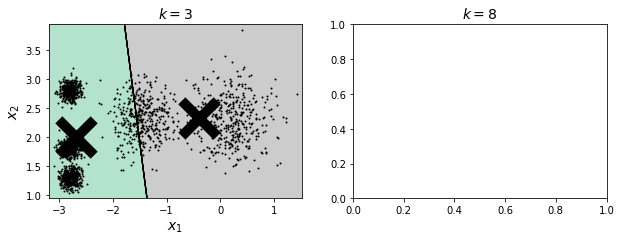

In [25]:
kmeans_k3 = KMeans(n_clusters=2, random_state=42)
kmeans_k8 = KMeans(n_clusters=20, random_state=42)

plot_clusterer_comparison(kmeans_k3, kmeans_k8, X, "$k=3$", "$k=8$")
plt.show()

## Solution: the silhouette score <a name="silhouette"></a>

One heuristic approach to decide on the optimal number of clusters is to look at the [_silhouette score_](https://en.wikipedia.org/wiki/Silhouette_(clustering)), which is the mean _silhouette coefficient_ over all the data samples. A sample's silhouette coefficient is equal to $(b - a)/\max(a, b)$ where $a$ is the mean distance to the other samples in the same cluster (it is the _mean intra-cluster distance_), and $b$ is the _mean nearest-cluster distance_, that is the mean distance to the samples of the next closest cluster (defined as the one that minimizes $b$, excluding the samples's own cluster). The silhouette coefficient can vary between -1 and +1: a coefficient close to +1 means that the sample is well inside its own cluster and far from other clusters, while a coefficient close to 0 means that it is close to a cluster boundary, and finally a coefficient close to -1 means that the sample may have been assigned to the wrong cluster.

In [79]:
from sklearn.metrics import silhouette_score

In [80]:
# calculate silhouette score
silhouette_score(X, kmeans.labels_)

0.656578194104489

Is this a good or a bad score? To tell we must compare it to the alternatives.

#### Exercise 2. a) Make a list `kmeans_per_k` of models initialized and fitted with K=0,1,2,...,10, and  
#### b) a list `silhouette_scores` containing the respective silohuette scores.

In [81]:
# %load solutions/ex2_2a.py
kmeans_per_k = [KMeans(n_clusters=k, random_state=42).fit(X)
                for k in range(1, 10)]

In [82]:
# %load solutions/ex2_2b.py
silhouette_scores = [silhouette_score(X, model.labels_)
                     for model in kmeans_per_k[1:]]

#### c) make a line plot showing the silhouette score as a function of k 

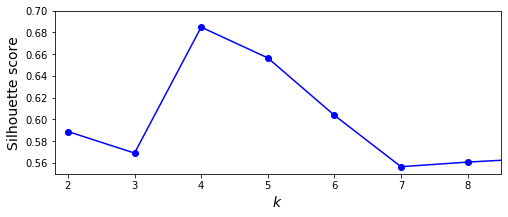

In [83]:
# %load solutions/ex2_2c.py
plt.figure(figsize=(8, 3))
plt.plot(range(2, 10), silhouette_scores, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Silhouette score", fontsize=14)
plt.axis([1.8, 8.5, 0.55, 0.7])
plt.show()

The plot tells that $k=4$ is a very good choice, but also shows that $k=5$ is quite good as well. 

## Silhouette diagrams <a name="silhouettediagram"></a>

An even more informative visualization is given when one plot the silhouette coefficient of every sample, sorted by the cluster they are assigned to and by the value of the coefficient. This is called a _silhouette diagram_

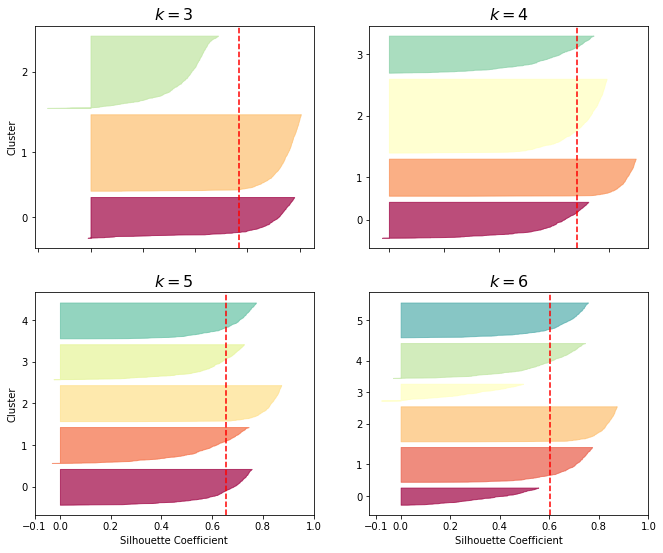

In [84]:
from sklearn.metrics import silhouette_samples
from matplotlib.ticker import FixedLocator, FixedFormatter
import matplotlib as mpl

plt.figure(figsize=(11, 9))

for k in (3, 4, 5, 6):
    plt.subplot(2, 2, k - 2)
    
    y_pred = kmeans_per_k[k - 1].labels_
    silhouette_coefficients = silhouette_samples(X, y_pred)

    padding = len(X) // 30
    pos = padding
    ticks = []
    for i in range(k):
        coeffs = silhouette_coefficients[y_pred == i]
        coeffs.sort()

        color = mpl.cm.Spectral(i / k)
        plt.fill_betweenx(np.arange(pos, pos + len(coeffs)), 0, coeffs,
                          facecolor=color, edgecolor=color, alpha=0.7)
        ticks.append(pos + len(coeffs) // 2)
        pos += len(coeffs) + padding

    plt.gca().yaxis.set_major_locator(FixedLocator(ticks))
    plt.gca().yaxis.set_major_formatter(FixedFormatter(range(k)))
    if k in (3, 5):
        plt.ylabel("Cluster")
    
    if k in (5, 6):
        plt.gca().set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
        plt.xlabel("Silhouette Coefficient")
    else:
        plt.tick_params(labelbottom=False)

    plt.axvline(x=silhouette_scores[k - 2], color="red", linestyle="--")
    plt.title("$k={}$".format(k), fontsize=16)

plt.show()

From these plots, it is more apparent that k=5 is a viable option.

# The importance of scaling <a name="scaling"></a>

The above dataset was arbitrarily constructed so that each feature lies within about the same range. Sometimes one feature might lie in [0,1] and another on [500,1000]. When KMean is applied, what do you think will happen?

## Without scaling

Text(0.5, 1.0, 'KMeans without scaling')

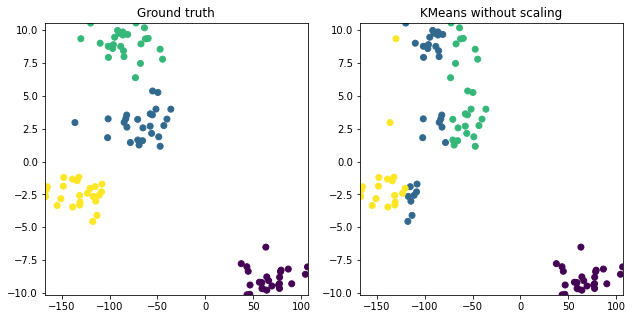

In [4]:
X,y = make_blobs(centers=4, random_state=51)
# scale one axis by 20
X=X@[[20,0],[0,1]] 
xmin,ymin,xmax,ymax = *X.min(0), *X.max(0) # the "*" just unpacks the values, not multiplication


fig = plt.figure(figsize=(16,5))

ax = fig.add_subplot(131)
plt.scatter(X[:,0],X[:,1], c=y)
plt.xlim(xmin,xmax)
plt.ylim(ymin,ymax)
plt.title('Ground truth')

ax = fig.add_subplot(132)
                     
# fit KMeans and predict
pred = KMeans(4).fit_predict(X)
plt.scatter(X[:,0],X[:,1], c=pred)
plt.xlim(xmin,xmax)
plt.ylim(ymin,ymax)
plt.title('KMeans without scaling')

This looks very different from what you probably expected. However, pay attention to the axes: the first axis is on a much larger scale, and thus this feature is considered more "important" by the algorithm. 

#### Exercise 3. Scale the data and rerun KMeans, and make an equivalent figure.

Tip: use sklearn's StandardScaler. Scalers in sklearn are used in the same syntax as other models: you must initialize it, and fit it. You can fit and transform ("predict") the data in a single step using the `fit_transform` method.

In [96]:
from sklearn.preprocessing import StandardScaler

Text(0.5, 1.0, 'KMeans with scaling')

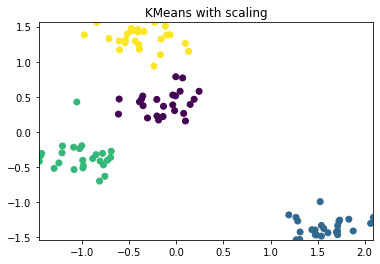

In [98]:
# %load solutions/ex2_3.py

## scale and fit on the scaled data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
pred = KMeans(4).fit_predict(X_scaled)

# plotting
xmin,ymin,xmax,ymax = *X_scaled.min(0), *X_scaled.max(0) # the "*" just unpacks the values, not multiplication
plt.scatter(X_scaled[:,0],X_scaled[:,1], c=pred)
plt.xlim(xmin,xmax)
plt.ylim(ymin,ymax)
plt.title('KMeans with scaling')

If you solved that correctly, you will see a proper clustering of the points, illustrating the importance of feature scaling. 